In [152]:
import pandas as pd

In [153]:
Chile_df = pd.read_csv('SismosChileFinal.csv')

In [154]:
Chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118307 entries, 0 to 118306
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           118307 non-null  int64  
 1   Fecha local          118307 non-null  object 
 2   Fecha UTC            118307 non-null  object 
 3   Latitud              118307 non-null  float64
 4   Longitud             118307 non-null  float64
 5   Profundidad(Km)      118307 non-null  float64
 6   MagnitudPromedio     118307 non-null  float64
 7   Magnitudes           118307 non-null  object 
 8   Lugar del Epicentro  118307 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 8.1+ MB


In [155]:
Chile_df.isnull().sum()

Unnamed: 0             0
Fecha local            0
Fecha UTC              0
Latitud                0
Longitud               0
Profundidad(Km)        0
MagnitudPromedio       0
Magnitudes             0
Lugar del Epicentro    0
dtype: int64

In [156]:
"""#Elimino Valores Nulos.
Chile_df.dropna(subset=['MagnitudPromedio', 'Magnitudes'], inplace=True)"""


"#Elimino Valores Nulos.\nChile_df.dropna(subset=['MagnitudPromedio', 'Magnitudes'], inplace=True)"

In [157]:
#Eliminar las columnas que no serán utilizadas.
Chile_df.drop(['Fecha UTC', 'Unnamed: 0'], axis=1, inplace=True)


In [158]:
import pandas as pd

# Dividir la columna "Hora y día del sismo" en fecha y hora
Chile_df['Fecha del sismo'] = pd.to_datetime(Chile_df['Fecha local']).dt.date
Chile_df['Hora del sismo'] = pd.to_datetime(Chile_df['Fecha local']).dt.time

# Eliminar la columna original "Hora y día del sismo"
Chile_df = Chile_df.drop('Fecha local', axis=1)

# Verificar el resultado
print(Chile_df.head())


   Latitud  Longitud  Profundidad(Km)  MagnitudPromedio        Magnitudes  \
0  -34.710   -70.174              0.0               3.1           Mc(3.1)   
1  -35.112   -71.375             63.1               3.0  Ml(3.1), Mc(2.9)   
2  -31.051   -71.310             64.4               2.7  Ml(2.5), Mc(2.9)   
3  -30.159   -70.141              5.4               3.0  Ml(2.7), Mc(3.3)   
4  -32.138   -71.753             11.0               3.4  Ml(3.3), Mc(3.6)   

          Lugar del Epicentro Fecha del sismo Hora del sismo  
0  76 km al E de San Fernando      2003-01-01       16:26:00  
1        44 km al NE de Talca      2003-01-01       14:22:00  
2   33 km al NO de Combarbalá      2003-01-01       14:02:00  
3        57 km al E de Vicuña      2003-01-01       13:25:00  
4     60 km al NO de La Ligua      2003-01-01       12:54:00  


In [159]:
CHILE_df = 'CHILE_df.csv'
Chile_df.to_csv('CHILE_df.csv', index=False)

In [160]:
Chile_df = pd.read_csv('CHILE_df.csv')


In [161]:
#Cambio de Nombres columnas
Chile_df = Chile_df.rename(columns={'MagnitudPromedio':'Magnitud', 'Magnitudes' : 'Tipo_Magnitud'})

In [162]:
# Agregar la columna 'ID_País' con el valor 'Chile' en cada fila
Chile_df['ID_País'] = 'CL'

In [163]:
# Definir el nuevo orden de las columnas
new_order = ["Fecha del sismo", "Hora del sismo", "Latitud", "Longitud", "Profundidad(Km)", "Magnitud", "Tipo_Magnitud", "Lugar del Epicentro", "ID_País"]

# Reindexar el DataFrame con el nuevo orden de columnas
Chile_df = Chile_df.reindex(columns=new_order)

In [164]:
CHILE_df = 'CHILE_df.csv'
Chile_df.to_csv('CHILE_df.csv', index=False)


In [165]:
Chile_df = pd.read_csv('CHILE_df.csv')

In [166]:
"""keywords = ['Chile', 'norte', 'sur', 'este', 'oeste', 'región', 'provincia', 'comuna', 'ciudad', 'localidad', 'isla', 'archipiélago', 'península', 'valle', 'cordillera', 'desierto', 'volcán', 'laguna', 'río', 'mar', 'océano', 'fiordo', 'estrecho', 'canal', 'bahía', 'golfo', 'playa', 'parque nacional', 'reserva nacional', 'monumento natural', 'santuario de la naturaleza', 'zona típica', 'sitio histórico', 'pueblo fantasma', 'glaciar', 'termas', 'bosque', 'cascada', 'geiser']

# Agregar la columna 'ID_Pais' con valores iniciales NaN
Chile_df['ID_Pais'] = None

# Función para asignar el código de país a partir del lugar
def asignar_codigo_pais(lugar):
    lugar = lugar.lower()
    for keyword in keywords:
        if keyword in lugar:
            return 'Chile'
    return None

# Aplicar la función a la columna 'Lugar' y crear la columna 'ID_Pais'
Chile_df['ID_Pais'] = Chile_df['Lugar'].apply(asignar_codigo_pais)
"""

"keywords = ['Chile', 'norte', 'sur', 'este', 'oeste', 'región', 'provincia', 'comuna', 'ciudad', 'localidad', 'isla', 'archipiélago', 'península', 'valle', 'cordillera', 'desierto', 'volcán', 'laguna', 'río', 'mar', 'océano', 'fiordo', 'estrecho', 'canal', 'bahía', 'golfo', 'playa', 'parque nacional', 'reserva nacional', 'monumento natural', 'santuario de la naturaleza', 'zona típica', 'sitio histórico', 'pueblo fantasma', 'glaciar', 'termas', 'bosque', 'cascada', 'geiser']\n\n# Agregar la columna 'ID_Pais' con valores iniciales NaN\nChile_df['ID_Pais'] = None\n\n# Función para asignar el código de país a partir del lugar\ndef asignar_codigo_pais(lugar):\n    lugar = lugar.lower()\n    for keyword in keywords:\n        if keyword in lugar:\n            return 'Chile'\n    return None\n\n# Aplicar la función a la columna 'Lugar' y crear la columna 'ID_Pais'\nChile_df['ID_Pais'] = Chile_df['Lugar'].apply(asignar_codigo_pais)\n"

In [167]:
Chile_df.head()

,Fecha del sismo,Hora del sismo,Latitud,Longitud,Profundidad(Km),Magnitud,Tipo_Magnitud,Lugar del Epicentro,ID_País
0,2003-01-01,16:26:00,-34.710,-70.174,0.0,3.1,Mc(3.1),76 km al E de San Fernando,CL
1,2003-01-01,14:22:00,-35.112,-71.375,63.1,3.0,"Ml(3.1), Mc(2.9)",44 km al NE de Talca,CL
2,2003-01-01,14:02:00,-31.051,-71.310,64.4,2.7,"Ml(2.5), Mc(2.9)",33 km al NO de Combarbalá,CL
3,2003-01-01,13:25:00,-30.159,-70.141,5.4,3.0,"Ml(2.7), Mc(3.3)",57 km al E de Vicuña,CL
4,2003-01-01,12:54:00,-32.138,-71.753,11.0,3.4,"Ml(3.3), Mc(3.6)",60 km al NO de La Ligua,CL


In [168]:
Chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118307 entries, 0 to 118306
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fecha del sismo      118307 non-null  object 
 1   Hora del sismo       118307 non-null  object 
 2   Latitud              118307 non-null  float64
 3   Longitud             118307 non-null  float64
 4   Profundidad(Km)      118307 non-null  float64
 5   Magnitud             118307 non-null  float64
 6   Tipo_Magnitud        118307 non-null  object 
 7   Lugar del Epicentro  118307 non-null  object 
 8   ID_País              118307 non-null  object 
dtypes: float64(4), object(5)
memory usage: 8.1+ MB


In [169]:
Chile_df['Tipo_Magnitud'].value_counts()

Tipo_Magnitud
Ml(2.8)                      7732
Ml(2.9)                      7691
Ml(2.7)                      7467
Ml(3.0)                      7225
Ml(2.6)                      7057
                             ... 
Mb(5.4), Ms(5.3), Mw(5.8)       1
Mb(5.9), Mw(5.7)                1
Mb(5.5), Ms(5.5), Mw(5.8)       1
Mb(6.0), Ms(6.3), Mw(6.6)       1
Ms(4.5)                         1
Name: count, Length: 1302, dtype: int64

In [170]:
import matplotlib.pyplot as plt

# Realizar el conteo de valores únicos en la columna 'institution'
institution_counts = Chile_df['Lugar'].value_counts()

# Obtener el top 10 de instituciones más populares
top_10_institutions = institution_counts.head(10)

# Generar un gráfico de barras para visualizar el top 10 de instituciones
plt.figure(figsize=(10, 6))
top_10_institutions.plot(kind='bar')
plt.xlabel('Institución')
plt.ylabel('Cantidad de cursos')
plt.title('Top 10 de instituciones más populares')
plt.xticks(rotation=75)
plt.show()


KeyError: 'Lugar'

Histograma de la columna "Magnitud_Promedio" para analizar la distribución de las magnitudes promedio:

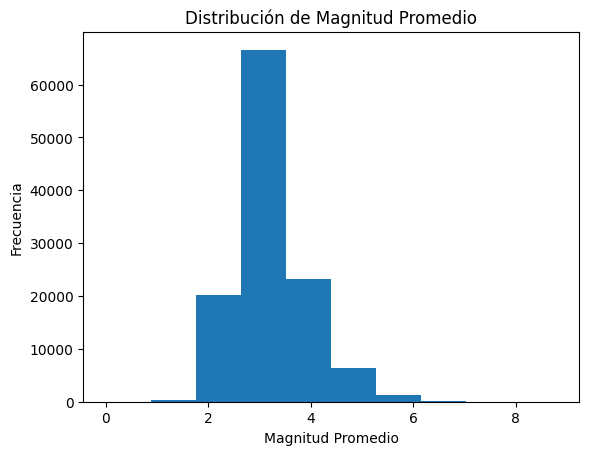

In [ ]:
import matplotlib.pyplot as plt

plt.hist(Chile_df['Magnitud'], bins=10)
plt.xlabel('Magnitud Promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Magnitud Promedio')
plt.show()


Gráfico de dispersión utilizando las columnas "Longitud" y "Latitud" para visualizar la distribución geográfica de los eventos:

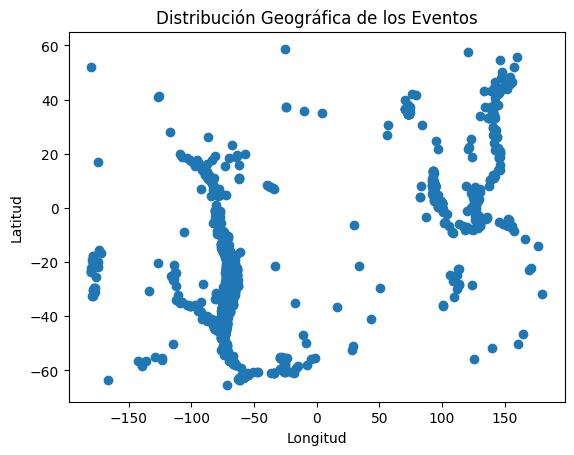

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Chile_df['Longitud'], Chile_df['Latitud'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de los Eventos')
plt.show()


**Análisis de la columna "Profundidad (Km)":**

Estadísticas descriptivas básicas:

In [ ]:
print(Chile_df['Profundidad'].describe())


count    118307.000000
mean         77.014587
std          61.259439
min           0.000000
25%          30.000000
50%          55.100000
75%         112.000000
max         676.000000
Name: Profundidad, dtype: float64
